In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from kuramoto import * # import the kuramoto classes from file 
from utils import *

In [ ]:
# Set up model parameters 
epsilon = 1 
gamma = -0.44
sigma = 0.45
mean_omega = 0

# Set up simulation parameters 
Lx = 200
Ly = 2
T = 5e3
n_frames = T

init= np.zeros((Lx*Ly)) # np.pi*np.random.normal(size=(Lx*Ly))

# Initialise the model and run the simulation 
sigmas = [0.2, 0.45, 0.6, 0.8]
seeds = [None]*4

data = [] 
for sigma in sigmas: 
    for seed in seeds: 
        model = Kuramoto2D(epsilon, gamma, sigma, mean_omega, BC='grad', grad=[-1.3, 1.3])
        model.initialise(Lx, Ly, T, n_frames, init=init, seed=seed)
        model.evolve() 

        indices = np.random.randint(2, size=Lx) 
        theta = model.res[-1].reshape((Lx, Ly))[np.arange(Lx), indices]
        shift(theta)
        data.append(theta) 

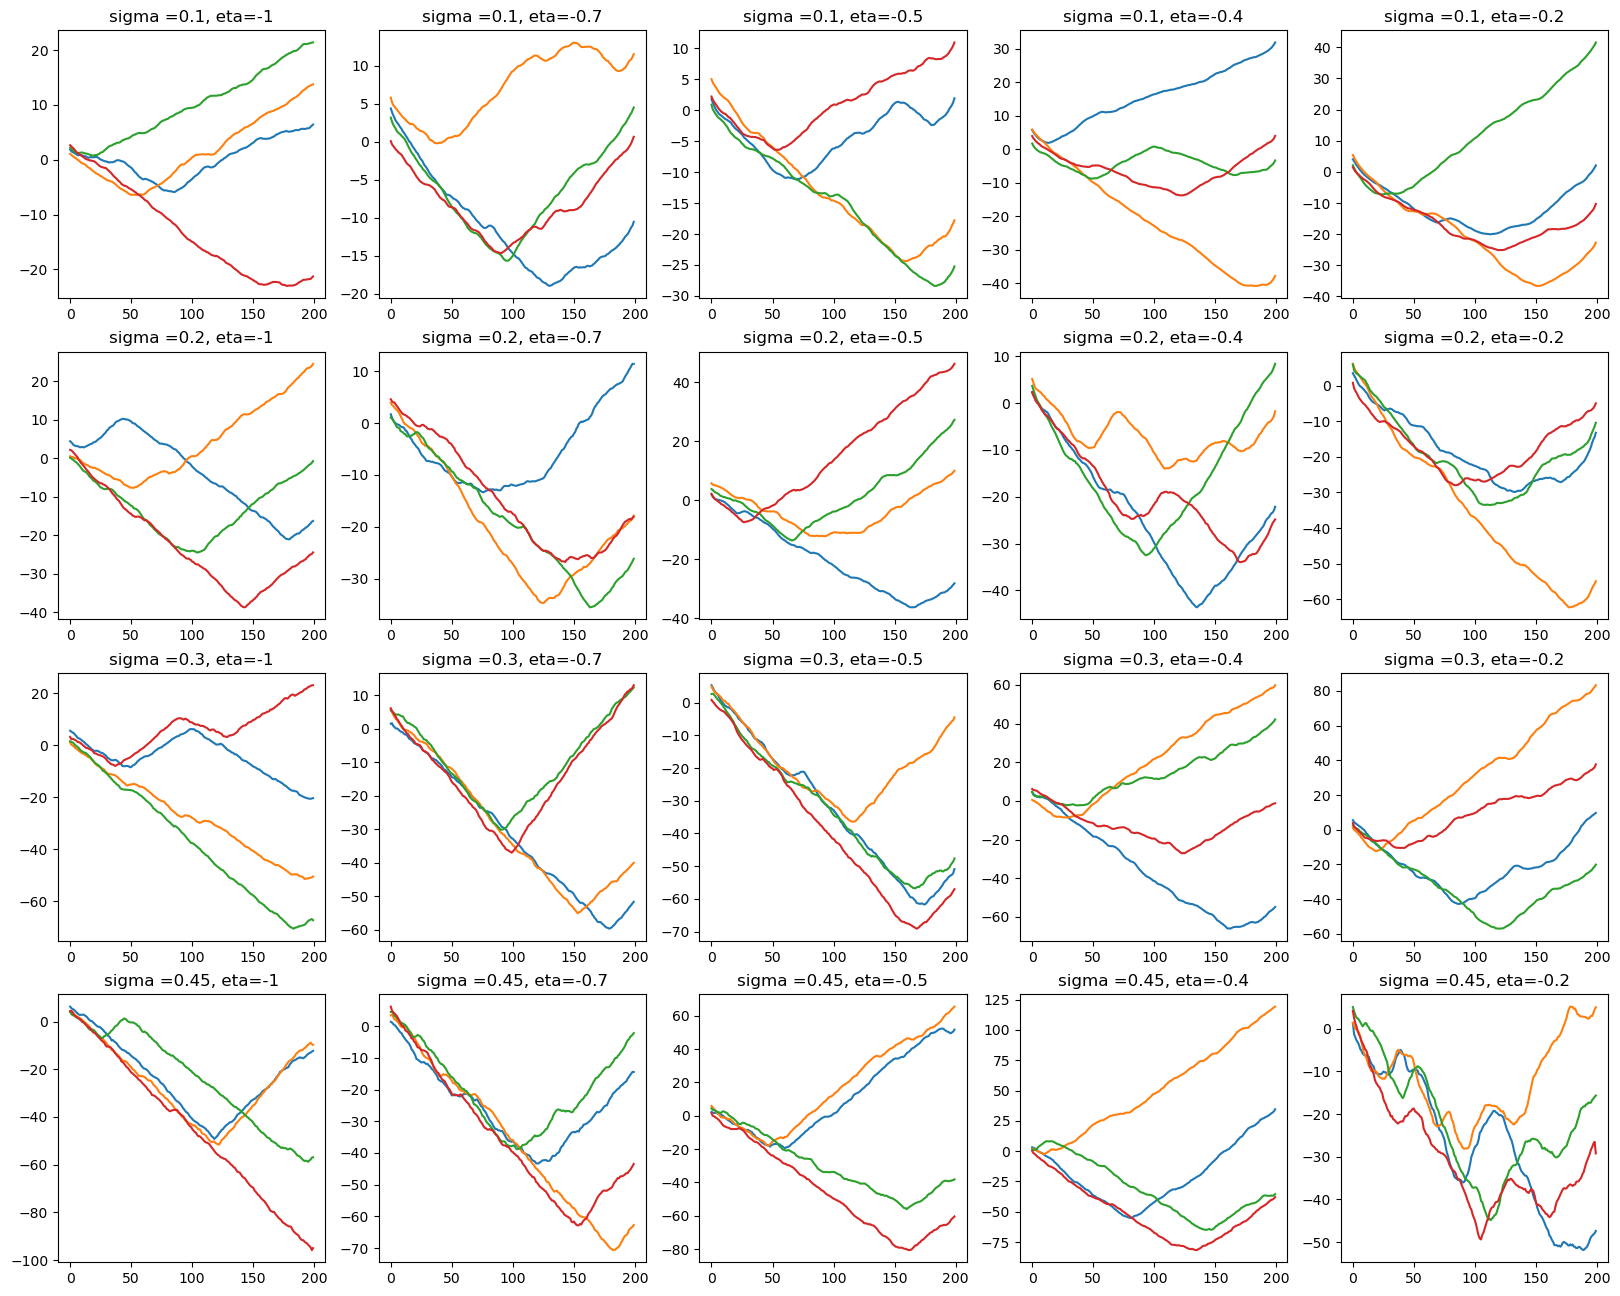

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', size=20, family='serif')

fig, axes = plt.subplots(len(sigmas), len(gammas), figsize=(20, 16)) 

i = 0 
for (a, sigma) in enumerate(sigmas):
    for seed in seeds: 
        theta = data[i] 
        axes[a, b].plot(data[i])
        i += 1
    axes[a, b].set_title('sigma ={}'.format(sigma))
plt.show() 

In [26]:
# Set up model parameters 
epsilon = 1 
gamma = -0.2
sigma = 0.4
mean_omega = 0

# Set up simulation parameters 
Lx = 200
Ly = 2
T = 1e3
n_frames = T
grad = 2

init= np.zeros((Lx*Ly)) # np.pi*np.random.normal(size=(Lx*Ly))

# Initialise the model and run the simulation 
seeds = [None]*3 

data = [] 
for seed in seeds: 
    model = Kuramoto2D(epsilon, gamma, sigma, mean_omega, BC='grad', grad=[-grad, grad])
    model.initialise(Lx, Ly, T, n_frames, init=init, seed=None)
    model.evolve() 

    indices = np.random.randint(2, size=Lx) 
    theta = model.res[-1].reshape((Lx, Ly))[np.arange(Lx), indices]
    shift(theta)
    data.append(theta) 

100%|███████████████████████████████████████| 1000/1000 [00:16<00:00, 60.63it/s]


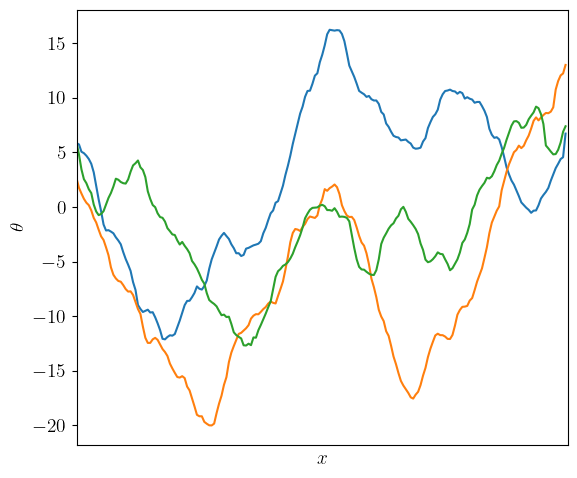

In [27]:
fig = plt.figure(figsize=(6, 5))
plt.rc('text', usetex=True)
plt.rc('font', size=14, family='serif')

for i in range(len(data)):
    plt.plot(data[i])  

plt.ylabel(r'$\theta$')
plt.xlim([0, Lx])
plt.xlabel(r'$x$')
plt.xticks([])
plt.tight_layout()
# plt.savefig('Figures/map_sim_overlap.pdf')
plt.show() 

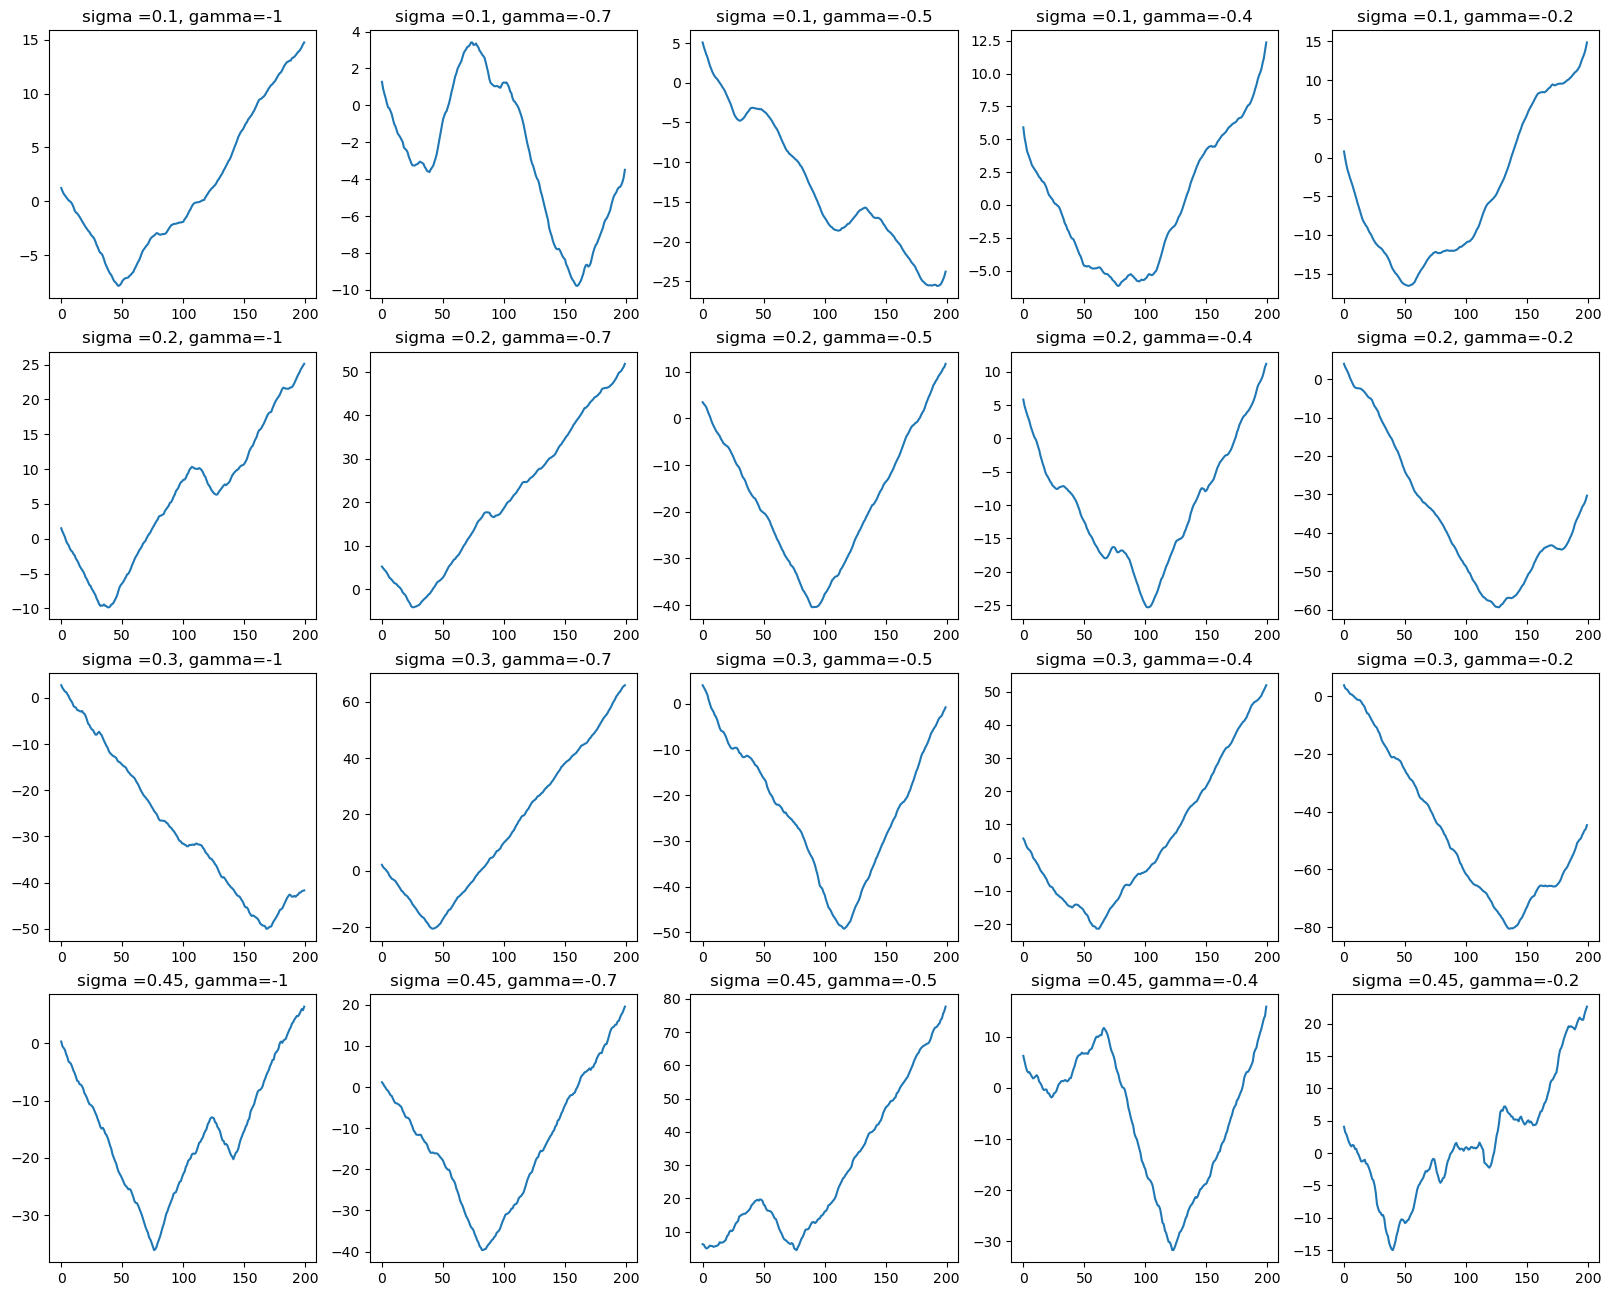

In [13]:
fig, axes = plt.subplots(len(sigmas), len(gammas), figsize=(20, 16)) 

i = 0 
for (a, sigma) in enumerate(sigmas):
    for (b, gamma) in enumerate(gammas): 
        theta = data[i] 
        axes[a, b].plot(data[i])
        axes[a, b].set_title('sigma ={}, gamma={}'.format(sigma, gamma))
        i += 1
plt.show() 
        

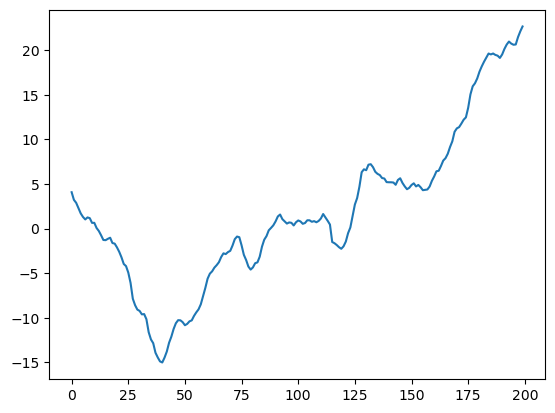

In [14]:
plt.plot(data[-1])
plt.show() 

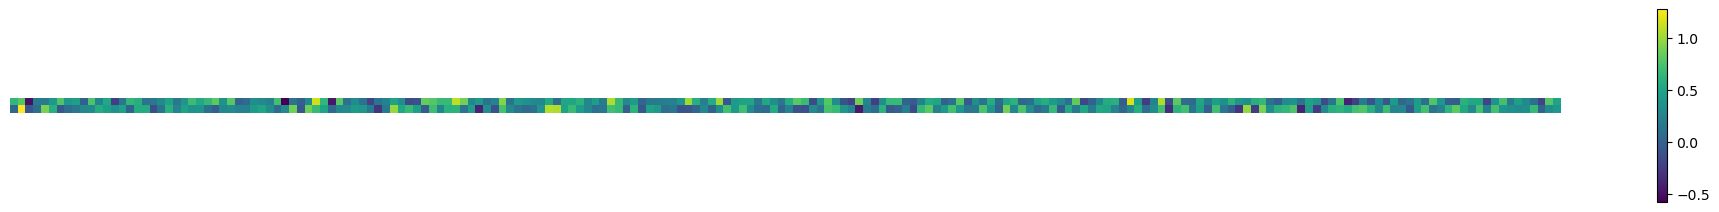

In [68]:
fig = plt.figure(figsize=(25, 5))
plt.imshow(model.omegas.T)
plt.colorbar(shrink=0.5) 
plt.axis('off')
plt.savefig('Figures/omegas.pdf')
plt.show() 

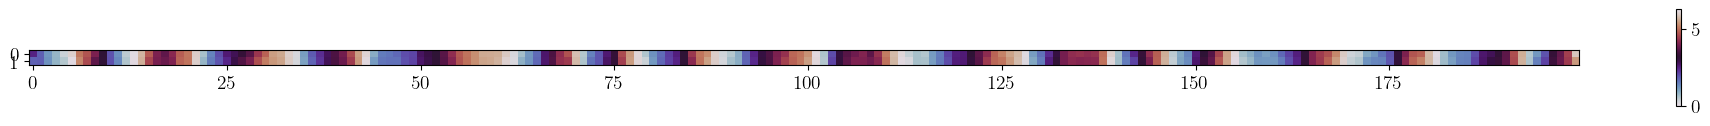

In [5]:
final = model.res[-1].reshape((model.Lx, model.Ly))
fig = plt.figure(figsize=(25, 5))
plt.imshow(final.T %(2*np.pi), vmin=0, vmax=2*np.pi, cmap='twilight', interpolation='None')
plt.colorbar(shrink=0.25)
plt.show() 

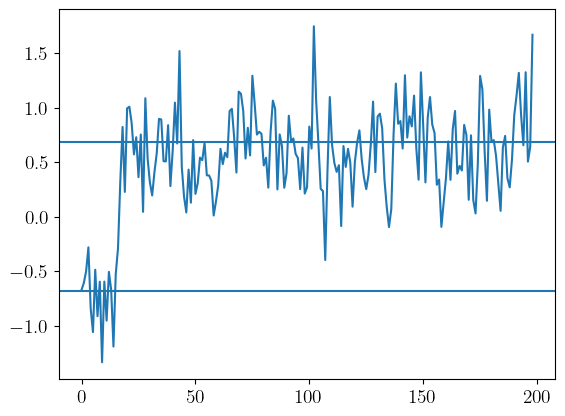

-0.6471141183762447 0.3757607020995353


In [11]:
phi = theta[1:] - theta[:-1]
plt.plot(phi)
omega = np.mean(2*(1-np.cos(phi)))
slope = np.sqrt(omega)
plt.axhline(y=slope)
plt.axhline(y=-slope)
plt.show() 

eta, grad = MAP(phi)
sigma = get_MAP_sigma(phi, eta, grad)
print(eta, sigma)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

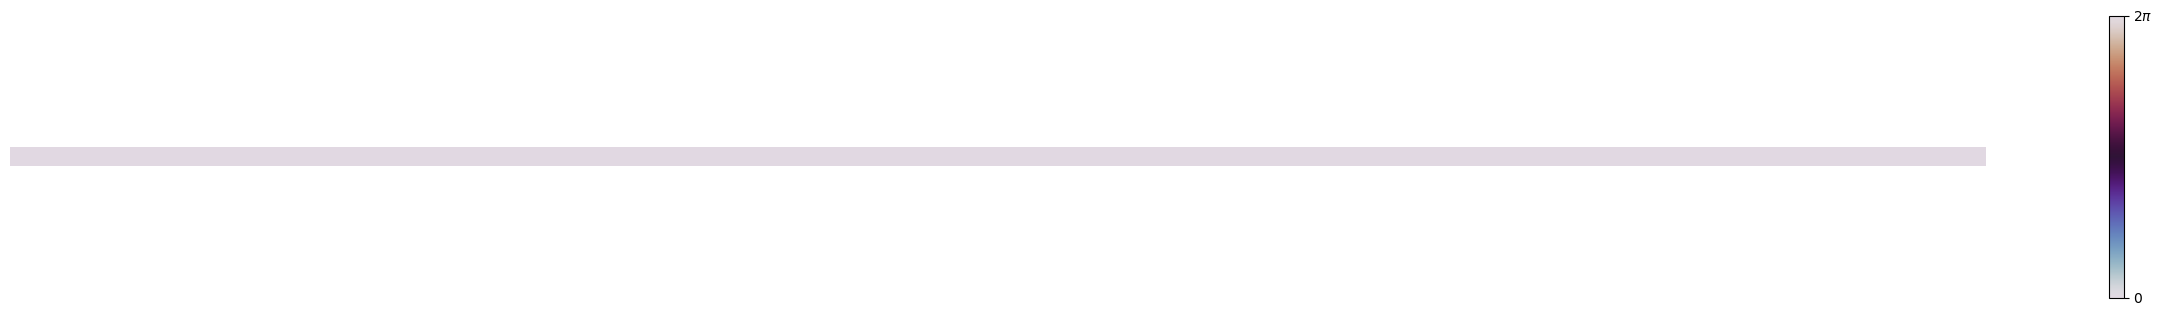

In [66]:
# Reshape the result into 2D shape 
phase_evolution = model.res.reshape((model.n_frames, model.Lx, model.Ly))[::6]

# Set up figure plotting 
fig = plt.figure(figsize=(25, 5))
low, high = 0, 2*np.pi 

# Plot the movie one snapshot at a time 
ims = []
im = plt.imshow(phase_evolution[0].T, vmin=low, vmax=high, interpolation='none', animated=True, cmap='twilight')
# plt.title(r'$\sigma={}, \epsilon ={}, \eta ={}$'.format(sigma, epsilon, gamma))
plt.axis('off')
cbar = plt.colorbar(im, shrink=0.6)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'0', r'$2\pi$'])
plt.tight_layout()
for i in range(phase_evolution.shape[0]):
    xy = phase_evolution[i].T % (2*np.pi)
    im = plt.imshow(xy, vmin=low, vmax=high, interpolation='none', animated=True, cmap='twilight')
    plt.axis('off')
    ims.append([im])
ani = am.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
mywriter = am.FFMpegWriter()
ani.save("Figures/movie.mp4", writer=mywriter)
plt.close()
